In [1]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import plotly.graph_objects as go
import plotly.express as xp

In [2]:
modi = pd.read_csv("modi_reviews.csv")
rahul = pd.read_csv('rahul_reviews.csv')

In [3]:
modi.head(3)

,Unnamed: 0,User,Tweet
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...


In [4]:
modi.shape

(25688, 3)

In [5]:
rahul.head(3)

,Unnamed: 0,User,Tweet
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...


In [6]:
rahul.shape

(14261, 3)

In [7]:
TextBlob(modi['Tweet'][0]).sentiment

Sentiment(polarity=0.35, subjectivity=0.36250000000000004)

In [8]:
TextBlob(rahul['Tweet'][10]).sentiment

Sentiment(polarity=-0.3814697265625, subjectivity=0.375)

In [9]:
modi['Tweet'] = modi['Tweet'].astype(str)
rahul['Tweet'] = rahul['Tweet'].astype(str)

def find_polarity(review):
    return TextBlob(review).sentiment.polarity

In [10]:
modi['Polarity'] = modi['Tweet'].apply(find_polarity)
rahul['Polarity'] = rahul['Tweet'].apply(find_polarity)

In [11]:
modi

,Unnamed: 0,User,Tweet,Polarity
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,0.350000
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000
3,3,TheNirbhay1,PM Modi creates a new record of being the only...,0.312121
4,4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,0.098788
...,...,...,...,...
25683,25683,shv_indian,#1DDrive #ModiSpeaksToNews18 #LokSabhaElection...,0.000000
25684,25684,SONUPINKOO,I am seriously worried about future of Indian ...,0.209524
25685,25685,SONUPINKOO,If @narendramodi is so Bad then Why does @INCI...,-0.700000
25686,25686,SONUPINKOO,"On this 23rd March (Pakistan Day), I Urge all ...",0.000000


In [12]:
rahul.head()

,Unnamed: 0,User,Tweet,Polarity
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...,0.218750
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...,0.000000
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...,0.000000
3,3,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ...",0.320000
4,4,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...,-0.166667


In [13]:
modi['Label'] = np.where(modi['Polarity'] > 0, 'positive', 'negative')
modi.loc[modi['Polarity'] == 0, 'Label'] = 'Neutral'

rahul['Label'] = np.where(rahul['Polarity'] > 0, 'positive', 'negative')
rahul.loc[rahul['Polarity'] == 0, 'Label'] = 'Neutral'

In [14]:
modi.head(20)

,Unnamed: 0,User,Tweet,Polarity,Label
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,0.350000,positive
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000,positive
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000,positive
3,3,TheNirbhay1,PM Modi creates a new record of being the only...,0.312121,positive
4,4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,0.098788,positive
5,5,UttarrPradesh,Which of the following should be top priority ...,0.250000,positive
6,6,Mdsr20351488,After 5yrs of Modi 🙁\n\n-SC vs SC\n-EC vs EC\n...,0.000000,Neutral
7,7,ShaileshWrites,@RenukaJain6\nI still remember your video mass...,-0.500000,negative
8,8,iamljp,#bjp @BJP4India @INCIndia @INCKarnataka how mu...,-0.342857,negative
9,9,TheShobhitAzad,#AzadPrediction\n#LokSabhaElections2019 \n\nBJ...,0.000000,Neutral


In [15]:
neutral_modi = modi[modi['Polarity']==0.0000]

remove_neutral_modi = modi['Polarity'].isin(neutral_modi['Polarity'])
modi.drop(modi[remove_neutral_modi].index,inplace=True)
print(neutral_modi.shape)
print(modi.shape)

(8206, 5)
(17482, 5)


In [16]:
neutral_rahul = rahul[rahul['Polarity']==0.0000]
remove_neutral_rahul = rahul['Polarity'].isin(neutral_rahul['Polarity'])
rahul.drop(rahul[remove_neutral_rahul].index,inplace=True)
print(neutral_rahul.shape)
print(rahul.shape)

(4894, 5)
(9367, 5)


In [17]:
print(modi.shape)
print(rahul.shape)

(17482, 5)
(9367, 5)


In [18]:
#modi
np.random.seed(10)
remove_n = 8482
drop_indices = np.random.choice(modi.index,remove_n,replace=False)
df_modi = modi.drop(drop_indices)

In [19]:
#modi
np.random.seed(10)
remove_n = 367
drop_indices1 = np.random.choice(rahul.index,remove_n,replace=False)
df_rahul = rahul.drop(drop_indices1)

In [20]:
print(df_modi.shape)
print(df_rahul.shape)

(9000, 5)
(9000, 5)


# prediction about indian election


In [21]:
modi_count = df_modi.groupby('Label').count()

In [22]:
modi_count

,Unnamed: 0,User,Tweet,Polarity
Label,,,,
negative,2629,2629,2629,2629
positive,6371,6371,6371,6371


In [23]:
rahul_count = df_rahul.groupby('Label').count()
rahul_count

,Unnamed: 0,User,Tweet,Polarity
Label,,,,
negative,3042,3042,3042,3042
positive,5958,5958,5958,5958


In [32]:
modi_count = df_modi.groupby('Label').count()
neg_modi = (modi_count['Polarity'].iloc[0] / 1000) * 100  
pos_modi = (modi_count['Polarity'].iloc[1] / 1000) * 100

In [35]:
rahul_count = df_rahul.groupby('Label').count()
neg_rahul = (rahul_count['Polarity'].iloc[0] / 1000) * 100
pos_rahul = (rahul_count['Polarity'].iloc[1] / 1000) * 10

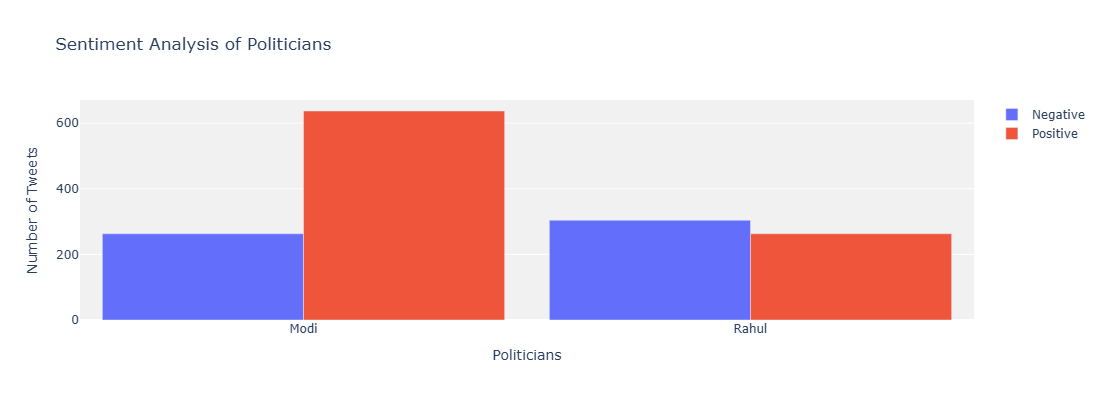

In [36]:
politicians = ['Modi','Rahul']

neg_list = [neg_modi,neg_rahul]
pos_list = [pos_modi,neg_modi]


fig = go.Figure(
data = [
    go.Bar(name='Negative',x=politicians,y=neg_list),
    go.Bar(name='Positive',x=politicians,y=pos_list)
]
)

# Improved layout with reduced bar gaps and adjusted width
fig.update_layout(
    title='Sentiment Analysis of Politicians',
    xaxis_title='Politicians',
    yaxis_title='Number of Tweets',
    barmode='group',
    plot_bgcolor='rgba(240, 240, 240, 0.9)',
    bargap=0.1,  # Reduce the gap between bars
    width=700,   # Adjust width to make the bars closer
    height=400   # Adjust height if needed
)
fig.show()